Importing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import spacy

%matplotlib inline

# For precision, recall, etc.
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing data
nlp = spacy.load('en_core_web_sm')
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

Perusing the data set

> 



In [3]:
#looking at what the data looks like
dftrain.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


By calling .info() some of the observations are that there are no null values and missing data. Also it can be noted that there are integers and objects in the data set. The text data is intuitively the object data. 

In [4]:
#more details on rows and columns
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We are able to see that the number of rows vs the number of unique tweet ids, they are the same, it is logical to use the tweet id as the index because is a unique number assigned to each tweet

In [5]:
#tweetid unique count, considering making it the index column
dftrain['tweetid'].nunique()

15819

In [6]:
# setting the tweet ID as index
dftrain.set_index('tweetid', inplace=True) 

In [7]:
dftrain.isnull().sum()

sentiment    0
message      0
dtype: int64

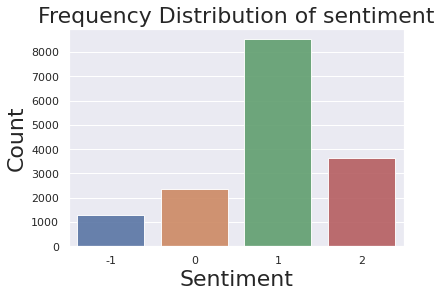

In [15]:
# bar graph showing the sentiment
sentiment_count = dftrain['sentiment'].value_counts()
sns.set(style="darkgrid")
sns.barplot(sentiment_count.index, sentiment_count.values, alpha=0.9)
plt.title('Frequency Distribution of sentiment', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xlabel('Sentiment', fontsize=22)
plt.show()

In [9]:
# Percentage of the total rows
sentiment_count/15819*100

 1    53.922498
 2    23.010304
 0    14.874518
-1     8.192680
Name: sentiment, dtype: float64

In [10]:
# Checking the average words in a tweet
num_words = dftrain['message'].apply(lambda x: len(x.split()))
num_words_mean, num_words_std = np.mean(num_words), np.std(num_words)

# checking the average sentences in a tweet
num_sentences = dftrain['message'].apply(lambda x: len(re.split( '~ ...' ,'~'.join(x.split('.')))))
num_sentences_mean = np.mean(num_sentences)

In [11]:
# The average number of words per message/tweet
num_words_mean

17.685062266894242

In [12]:
# The standard deviation of words
num_words_std

4.443768113870797

In [13]:
# The average sentences per message/tweet
num_sentences_mean

1.4003413616537075

It is prudent to remove stop words because they are adding unnecessary characters to the text data. 

In [14]:
from nltk.corpus import stopwords

# Apply this code to every textual string
word_list = message.split() 
filtered_words = [word for word in word_list if word not in stopwords.words('english')]
message = ' '.join(filtered_words)

NameError: ignored

Pre-processing

In [ ]:
# labels
y = dftrain['sentiment']

# features
X = dftrain.drop('sentiment', axis=1)

In [ ]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

Training data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
lr.intercept_[0]

In [ ]:
# Predicting the model
pred_lr = lr.predict(X_test)

Assessing the model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, pred_lr)
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']

pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

In [ ]:
# Classification report
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['-1: Anti', '0: Neutral', '1: Pro', '2: News']))